In [1]:
f = open("token.txt", "r")
token = f.read()

In [2]:
import quandl
quandl.ApiConfig.api_key = token

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from functools import reduce

In [4]:
wti_crude = quandl.get("EIA/PET_RWTC_D", start_date = '2010-12-31')

In [5]:
wti_crude.rename(columns = {'Value':'Petroleo'}, inplace = True)

C:\Users\rlpro\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

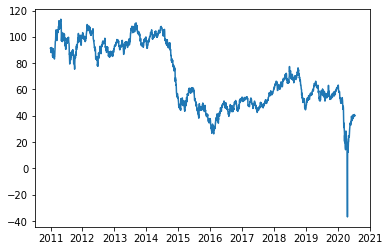

In [6]:
plt.plot(wti_crude)
plt.show

In [7]:
selic = quandl.get("BCB/432", start_date = '2010-12-31')

In [8]:
selic.rename (columns={'Value':"selic"}, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

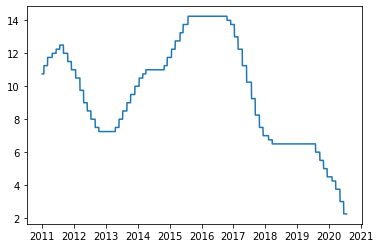

In [9]:
plt.plot(selic)
plt.show

In [10]:
ipca = quandl.get("BCB/13522", start_date = '2010-12-31')

In [11]:
ipca.rename (columns={'Value':"ipca"}, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

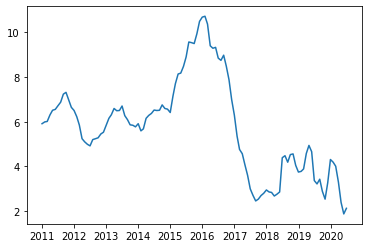

In [12]:
plt.plot(ipca)
plt.show

In [13]:
dolar = quandl.get("bcb/10813", start_date = '2010-12-31')

In [14]:
dolar.rename (columns={'Value':"dolar"}, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

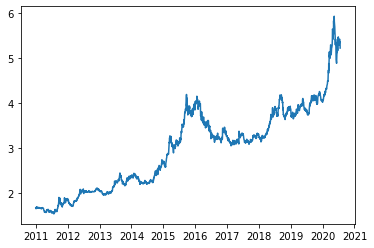

In [15]:
plt.plot(dolar)
plt.show

In [16]:
ouro = quandl.get("bcb/4", start_date = '2010-12-31')

In [17]:
ouro.rename (columns={'Value':"ouro"}, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

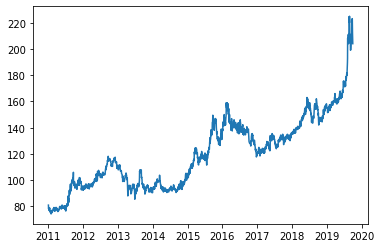

In [18]:
plt.plot(ouro)
plt.show

In [19]:
cdi = quandl.get("bcb/4392", start_date = '2010-12-31')

In [20]:
cdi.rename (columns={'Value':"CDI"}, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

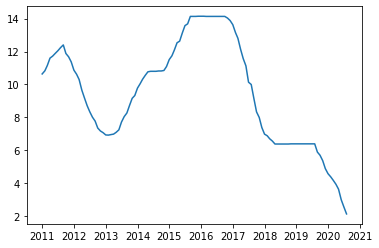

In [21]:
plt.plot(cdi)
plt.show

In [22]:
PIB_BR = quandl.get("ODA/BRA_NGDPD", start_date = '2010-12-31')

In [23]:
PIB_BR.rename (columns={'Value':"PIB_BR"}, inplace = True)

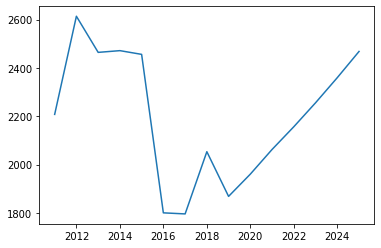

In [24]:
plt.plot(PIB_BR)
plt.show()

In [25]:
ibov = quandl.get("BCB/7845", start_date = '2010-12-31')

In [26]:
ibov.rename (columns={'Value':"IBOV"}, inplace = True)

In [27]:
data_frame = [selic, ipca, dolar, ibov, ouro,wti_crude]

df_junto = reduce(lambda left,right: pd.merge(left,right,on=['Date'], how='inner'), data_frame)

In [28]:
df_junto.describe()

,selic,ipca,dolar,IBOV,ouro,Petroleo
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,10.265385,6.045077,2.753171,62740.892308,117.574154,73.875538
std,2.727850,2.014651,0.804375,14520.369806,25.227793,23.206821
min,6.500000,2.460000,1.560300,42793.000000,74.300000,32.740000
25%,7.500000,4.660000,2.030800,53080.000000,95.000000,50.540000
50%,10.750000,6.150000,2.993000,57474.000000,117.000000,69.880000
75%,12.250000,6.970000,3.393400,66574.000000,136.000000,96.470000
max,14.250000,10.480000,4.134700,101812.000000,179.900000,107.080000


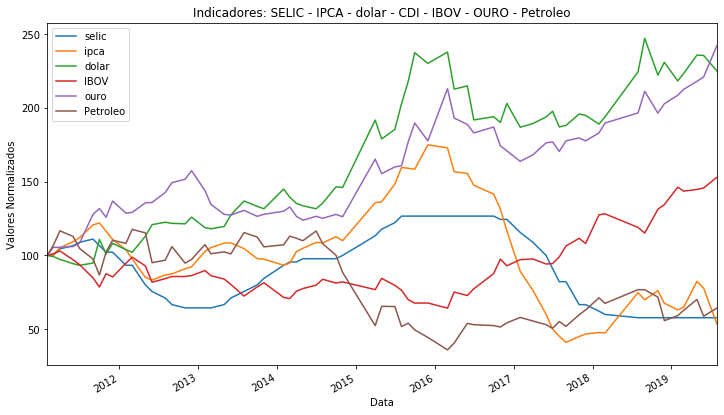

In [31]:
(df_junto/df_junto.iloc[0]*100).plot(figsize = (12,7))
plt.ylabel('Valores Normalizados')
plt.title('Indicadores: SELIC - IPCA - dolar - CDI - IBOV - OURO - Petroleo');
plt.xlabel('Data'); #definindo nome do eixo X
plt.show()